In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data

df = pd.read_csv("listings_wrangled")
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,0.03,1,267,1,4,2.0,1.5 baths,"[""HDTV with Disney+, HBO Max, standard cable, ..."
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,0.73,1,0,0,1,1.0,1 shared bath,"[""Hair dryer"", ""Smoke alarm"", ""Carbon monoxide..."
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,0.30,2,322,0,2,1.0,NaN,"[""Heating"", ""Wifi"", ""Long term stays allowed"",..."
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,559,3.38,1,79,50,2,1.0,1 bath,"[""Shampoo"", ""Conditioner"", ""TV"", ""Drying rack ..."
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,49,0.31,3,365,1,1,NaN,1 bath,"[""Carbon monoxide alarm"", ""Stove"", ""Bathtub"", ..."


In [3]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9379
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
accommodates                         0
bedrooms                          3792
bathrooms_text                      47
amenities                            0
dtype: int64

In [4]:
avg_price = round(df.price.mean(),2)
print(avg_price)

222.14


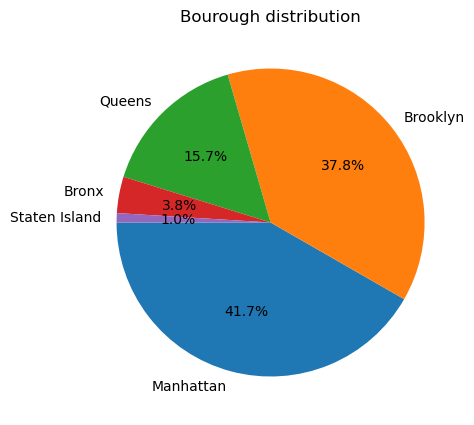

In [5]:
plt.figure(figsize=(9,5))
plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.title("Bourough distribution")
plt.show()

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


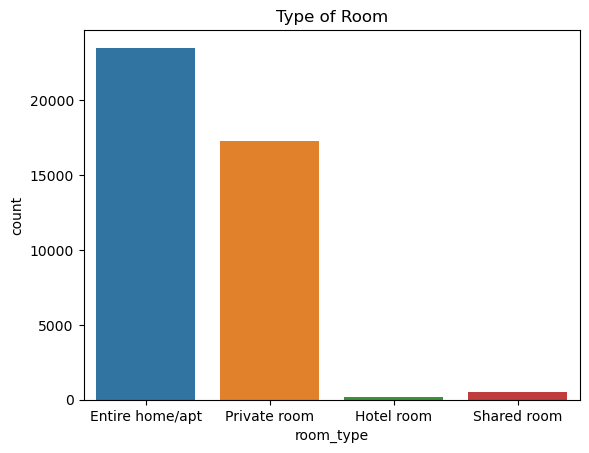

In [6]:
plt.figure()
plt.title("Type of Room")
sns.countplot(df.room_type)

plt.show()

Entire home/apt has the greatest share, followed by Private room. Shared rooms aren't too popular. Hotel room listings will be dropped.

In [7]:
df = df[df.room_type != 'Hotel room']

Room types on Neighborhood group

c:\Users\Nizar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


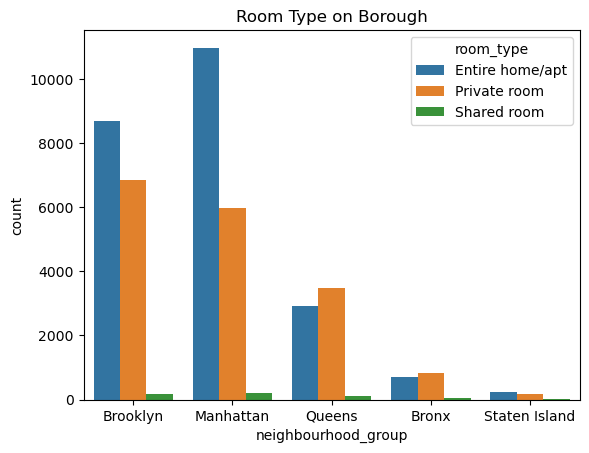

In [8]:
plt.figure()
plt.title("Room Type on Borough")
sns.countplot(df.neighbourhood_group, hue=df.room_type)
plt.show()

Interestingly, Queens and the Bronx residents are more likely to list a private room then the entire unit.

Next lets compare their availability.

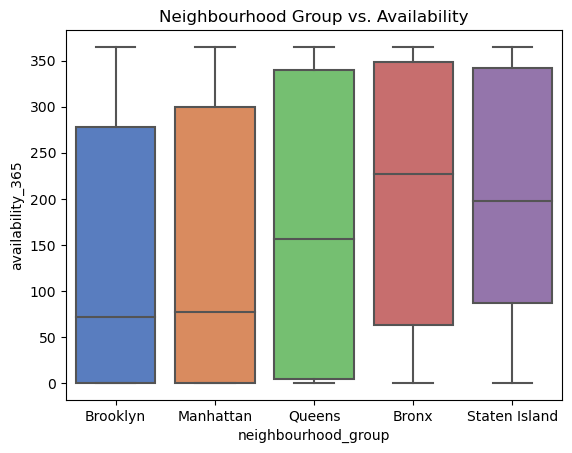

In [9]:
# plt.style.use('classic')
plt.figure()
plt.title("Neighbourhood Group vs. Availability")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="muted")
plt.show()

Next price distribution

In [10]:
df.price.describe()


count    41345.000000
mean       221.095296
std        921.149523
min         10.000000
25%         80.000000
50%        130.000000
75%        220.000000
max      98159.000000
Name: price, dtype: float64

In [11]:
print((df.price > 500).value_counts())
prop = len(df[df.price > 500]) / len(df)
print("Proportion of listings over $500: {:.2%}".format(prop))

False    38952
True      2393
Name: price, dtype: int64
Proportion of listings over $500: 5.79%


I took care of the "free" listings in an earlier step, but I haven't addressed the other outliers that are skewing the distribution. With a Max price over 400 times larger than the mean price, it will be difficult to meaningfully visualize the data. Since the 75th percentile is 220,  excluding any listings above $500 will allow me to better see the spread. Those listings represent nearly 6% of data though, so it is important not to draw any conclusions just yet. 

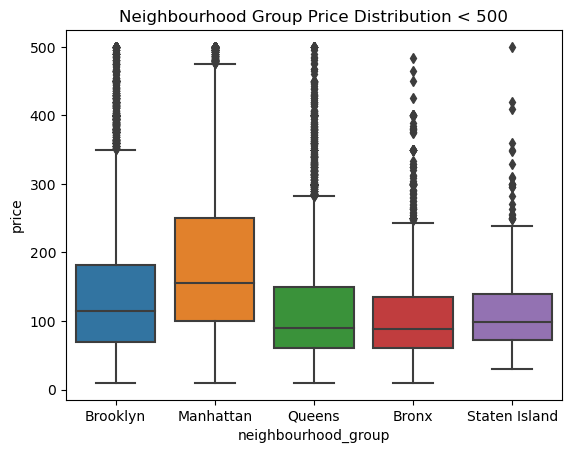

In [12]:
df_u500 = (df[df.price <= 500])
sns.boxplot(x='neighbourhood_group', y='price', data=df_u500)
plt.title('Neighbourhood Group Price Distribution < 500')
plt.show()


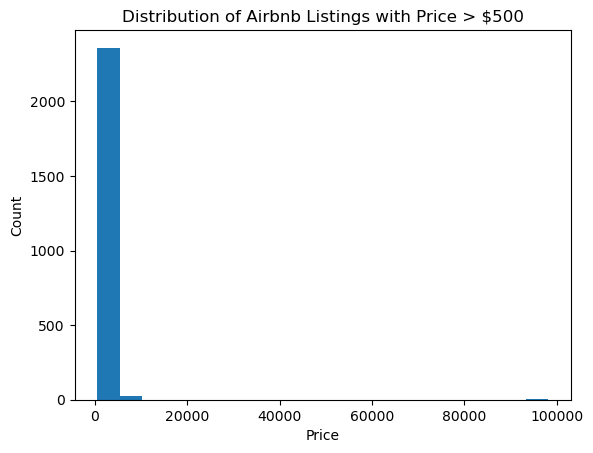

In [13]:
# Listings with price > $500?

df_o500 = (df[df.price > 500])
plt.hist(df_o500.price, bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Airbnb Listings with Price > $500')
plt.show()

Most of the datapoints are below $20000. I will inspect the high-priced listings and determine whether they should be kept in the dataset or not.

In [14]:
df[df['price'] >= 20000]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities
9256,15604499,The Parachute Loft Bedrm 1,62605071,Brooklyn,Coney Island,40.57717,-73.99986,Private room,75120,30,112,1.54,6,33,0,1,1.0,1 shared bath,"[""Carbon monoxide alarm"", ""Portable fans"", ""Pe..."
9645,16289102,"Comfy private room, great location to Manhattan",92493393,Staten Island,West Brighton,40.63304,-74.11275,Private room,65115,2,55,0.75,3,1,5,2,1.0,1 shared bath,"[""Carbon monoxide alarm"", ""Shampoo"", ""Private ..."
31497,563183407738604083,A cozy one bedroom in ocean hill Brooklyn...,422985413,Brooklyn,Bedford-Stuyvesant,40.68193,-73.91635,Entire home/apt,98159,2,3,0.61,1,62,3,2,1.0,1 bath,"[""Carbon monoxide alarm"", ""Portable fans"", ""Ho..."
37227,706066765395654135,Zll White Favorite Room,445395972,Bronx,Wakefield,40.88671,-73.86431,Entire home/apt,95110,2,0,NaN,5,36,0,2,1.0,1 bath,"[""Bed linens"", ""Central heating"", ""Smoke alarm..."


The third listing above is currently priced at $98 on Airbnb's website, which is suspcisiously similar to the price listed here at 98159. These listings are all definitely mispriced. There is no point in checking and adjusting each one individually, I will just drop them.

In [15]:
df = df.drop(df[df.price >= 20000].index)
print(f"New mean: {np.mean(df.price):.2f}")
print(f"New std: {np.std(df.price):.2f}")

New mean: 213.05
New std: 401.42


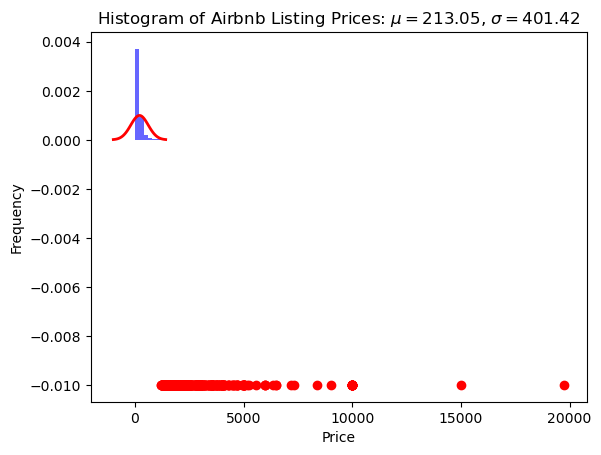

In [16]:
from scipy.stats import norm
prices = df.price
mu, sigma = norm.fit(prices)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax.hist(prices, bins=100, density=True, alpha=0.6, color='blue')
ax.plot(x, y, 'r', linewidth=2)
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title(r'Histogram of Airbnb Listing Prices: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

price_outliers = df[df['price'] > sigma*3]['price']
ax.plot(price_outliers, np.zeros_like(price_outliers) - 0.01, 'ro')

plt.show()

There are still a significant amount of outliers. Let's inspect those above the 99.7 percentile.

In [17]:
df[df.price > sigma*3]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms_text,amenities
322,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Manhattan,Upper West Side,40.775100,-73.985950,Entire home/apt,2500,30,26,0.20,10,365,0,9,2.0,2.5 baths,"[""Carbon monoxide alarm"", ""Pets allowed"", ""Sha..."
474,428226,Bright & Vibrant in Crown Heights,2128778,Brooklyn,Crown Heights,40.672510,-73.956610,Private room,5560,2,73,0.57,1,28,2,1,1.0,1 shared bath,"[""Carbon monoxide alarm"", ""Shampoo"", ""Stove"", ..."
734,619144,Central Park View From High Floor,1028165,Manhattan,Hell's Kitchen,40.766910,-73.983610,Shared room,2000,30,2,0.02,1,0,0,16,1.0,1 shared bath,"[""Washer"", ""Elevator"", ""Heating"", ""Wifi"", ""Lon..."
895,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Manhattan,Upper West Side,40.774930,-73.987320,Entire home/apt,2500,30,59,0.47,10,365,0,8,2.0,2.5 baths,"[""Carbon monoxide alarm"", ""Shampoo"", ""Bathtub""..."
960,893413,Architecturally Stunning Former Synagogue!,4751930,Manhattan,East Village,40.726940,-73.981730,Entire home/apt,2643,30,31,0.31,1,148,3,10,4.0,2.5 baths,"[""Carbon monoxide alarm"", ""Hot water kettle"", ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41403,773314804331716702,"Mansion For Events, Photoshoots",47633041,Queens,Jamaica Estates,40.718676,-73.782006,Entire home/apt,1500,1,0,NaN,5,364,0,16,2.0,1 bath,"[""Carbon monoxide alarm"", ""Hot water kettle"", ..."
41404,773331752728906911,Church Place by Rove Travel | New 3 BD Apt in ...,17775359,Manhattan,Tribeca,40.720512,-74.004388,Entire home/apt,9999,30,0,NaN,10,337,0,6,3.0,3 baths,"[""Carbon monoxide alarm"", ""Shampoo"", ""Stove"", ..."
41471,773525826132328318,Lovely 6-bedrm townhouse in NYC,489214566,Manhattan,Upper East Side,40.770089,-73.962419,Entire home/apt,2830,10,0,NaN,1,359,0,12,6.0,8 baths,"[""Sound system with Bluetooth and aux"", ""Hot w..."
41500,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Manhattan,Murray Hill,40.746902,-73.978260,Entire home/apt,3888,2,0,NaN,8,365,0,16,9.0,4.5 baths,"[""Carbon monoxide alarm"", ""Hot water kettle"", ..."


There is no way accurately verify these listings and there are enough samples in the dataset to risk losing some accuracy in the model. I will drop them.

In [18]:
df = df.drop(df.loc[df.price > sigma*3].index)

In [19]:
df.price.describe()

count    40747.000000
mean       178.064373
std        161.756725
min         10.000000
25%         80.000000
50%        130.000000
75%        211.000000
max       1200.000000
Name: price, dtype: float64

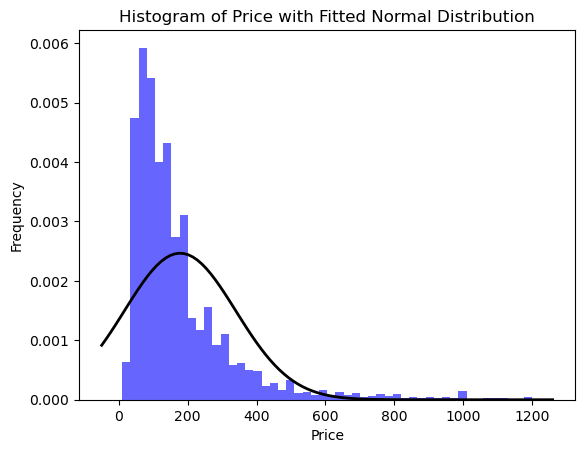

In [20]:
plt.hist(df.price, bins=50, density=True, alpha=0.6, color='b')

# plot PDF of normal distribution
mu, std = norm.fit(df.price)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price with Fitted Normal Distribution')

plt.show()

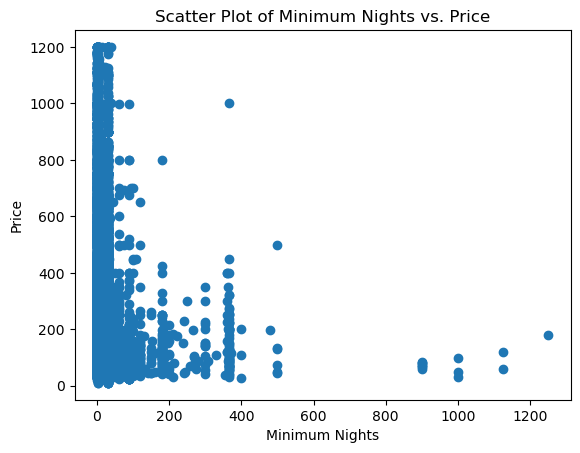

In [21]:
plt.scatter(df['minimum_nights'], df['price'])
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Scatter Plot of Minimum Nights vs. Price')
plt.show()

In [22]:
df = df.rename(columns={'neighbourhood_group': 'borough'})
boroughs = df.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])
boroughs = boroughs.round(2).sort_values("mean", ascending=False)
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 69, 175, 350, np.inf]
df["price_range"] = pd.cut(df["price"], bins=ranges, labels=label_names)
prices_by_borough = df.groupby(["borough", "price_range"])["price_range"].count()
df.price_range.value_counts(sort=False)

Budget          7799
Average        19102
Expensive       9942
Extravagant     3904
Name: price_range, dtype: int64

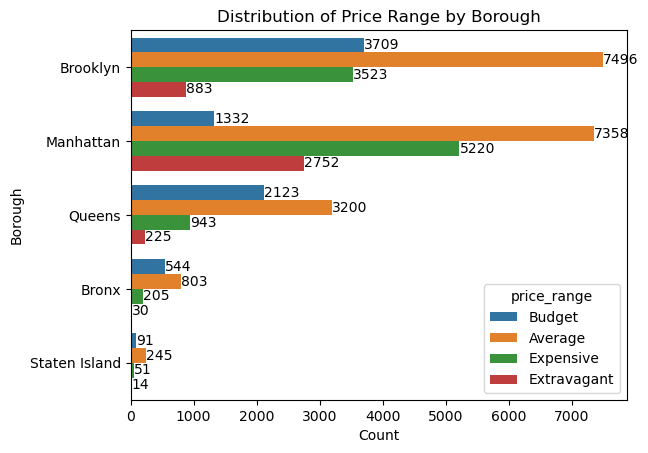

In [23]:
ax = sns.countplot(y='borough', hue='price_range', data=df)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.ylabel('Borough')
plt.xlabel('Count')
plt.title('Distribution of Price Range by Borough')
plt.show()

In [24]:
df['bathrooms'] = df['bathrooms_text'].str.extract(r'(\d+)', expand=False).astype(float)
df.loc[df.bathrooms.isna()].bathrooms_text.value_counts()

Half-bath            37
Shared half-bath     17
Private half-bath    12
Name: bathrooms_text, dtype: int64

In [25]:
df.bathrooms.fillna(value=1, inplace=True)
df.bathrooms.value_counts()

1.0    35928
2.0     4137
3.0      366
0.0      213
4.0       84
5.0       12
6.0        7
Name: bathrooms, dtype: int64

In [26]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,accommodates,bedrooms,bathrooms
count,4.074700e+04,4.074700e+04,40747.000000,40747.000000,40747.000000,40747.000000,40747.000000,31765.000000,40747.000000,40747.000000,40747.000000,40747.000000,36990.000000,40747.000000
mean,1.704218e+17,1.387333e+08,40.728056,-73.943838,178.064373,18.758608,26.342356,1.279265,20.374899,141.877733,8.061011,2.881562,1.359043,1.122488
std,2.956467e+17,1.521952e+08,0.057497,0.056085,161.756725,30.741879,55.798666,1.925491,69.207090,143.842308,18.582670,1.908052,0.723698,0.394013
min,2.595000e+03,2.438000e+03,40.500314,-74.249840,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.804666e+07,1.468051e+07,40.687400,-73.981805,80.000000,2.000000,1.000000,0.140000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000
50%,4.104247e+07,6.381370e+07,40.723065,-73.952550,130.000000,13.000000,5.000000,0.580000,1.000000,85.000000,1.000000,2.000000,1.000000,1.000000
75%,5.380053e+17,2.368835e+08,40.762420,-73.924306,211.000000,30.000000,25.000000,1.880000,4.000000,308.000000,8.000000,4.000000,1.000000,1.000000
max,7.741268e+17,4.899967e+08,40.911380,-73.710870,1200.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000,16.000000,11.000000,6.000000


In [27]:
# create a new column 'reviews_count'
df['reviews_count'] = df.apply(lambda row: row['number_of_reviews_ltm'] if row['number_of_reviews_ltm'] != row['number_of_reviews'] else row['number_of_reviews'], axis=1)

# fill missing values in 'reviews_count' with values from other column
df['reviews_count'].fillna(df['number_of_reviews'], inplace=True)

# drop 'number_of_reviews' and 'number_of_reviews_ltm' columns
df.drop(['number_of_reviews', 'number_of_reviews_ltm'], axis=1, inplace=True)


In [28]:
df.reviews_count.describe()

count    40747.000000
mean         8.061011
std         18.582670
min          0.000000
25%          0.000000
50%          1.000000
75%          8.000000
max        992.000000
Name: reviews_count, dtype: float64

In [29]:
corr_matrix = df[['reviews_count', 'price']].corr()
print(corr_matrix)

               reviews_count     price
reviews_count       1.000000  0.048904
price               0.048904  1.000000


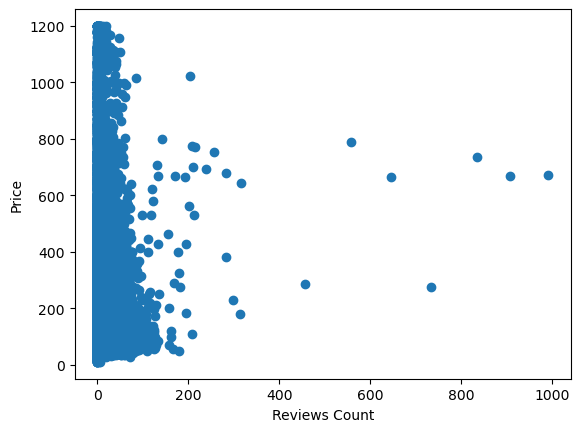

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df['reviews_count'], df['price'])
plt.xlabel('Reviews Count')
plt.ylabel('Price')
plt.show()

In [31]:
df.head()

,id,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,bedrooms,bathrooms_text,amenities,price_range,bathrooms,reviews_count
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,0.03,1,267,4,2.0,1.5 baths,"[""HDTV with Disney+, HBO Max, standard cable, ...",Expensive,1.0,1
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,0.73,1,0,1,1.0,1 shared bath,"[""Hair dryer"", ""Smoke alarm"", ""Carbon monoxide...",Average,1.0,0
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,0.30,2,322,2,1.0,NaN,"[""Heating"", ""Wifi"", ""Long term stays allowed"",...",Budget,1.0,0
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,3.38,1,79,2,1.0,1 bath,"[""Shampoo"", ""Conditioner"", ""TV"", ""Drying rack ...",Budget,1.0,50
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,0.31,3,365,1,NaN,1 bath,"[""Carbon monoxide alarm"", ""Stove"", ""Bathtub"", ...",Average,1.0,1


In [32]:
df.room_type.value_counts()

Entire home/apt    23227
Private room       16995
Shared room          525
Name: room_type, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder

# define ordering of categories to be encoded
cols_categorical = ['room_type', 'price_range']
room_order = ['Shared room', 'Private room', 'Entire home/apt']
price_order = ["Budget", "Average", "Expensive", "Extravagant"]

# create a dict to store encoder object
encoders = dict()

for col, order in zip(cols_categorical, [room_order, price_order]):
    encoders[col] = LabelEncoder()
    encoders[col].fit(order)
    df[col+'_encoded'] = encoders[col].transform(df[col])

In [34]:
df.head()

,id,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,accommodates,bedrooms,bathrooms_text,amenities,price_range,bathrooms,reviews_count,room_type_encoded,price_range_encoded
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,...,267,4,2.0,1.5 baths,"[""HDTV with Disney+, HBO Max, standard cable, ...",Expensive,1.0,1,0,2
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,...,0,1,1.0,1 shared bath,"[""Hair dryer"", ""Smoke alarm"", ""Carbon monoxide...",Average,1.0,0,1,0
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,...,322,2,1.0,NaN,"[""Heating"", ""Wifi"", ""Long term stays allowed"",...",Budget,1.0,0,1,1
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,...,79,2,1.0,1 bath,"[""Shampoo"", ""Conditioner"", ""TV"", ""Drying rack ...",Budget,1.0,50,1,1
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,175,30,...,365,1,NaN,1 bath,"[""Carbon monoxide alarm"", ""Stove"", ""Bathtub"", ...",Average,1.0,1,0,0


In [35]:
print(df.bedrooms.value_counts(), df.bedrooms.isna().sum())

1.0     27753
2.0      6177
3.0      2336
4.0       549
5.0       122
6.0        37
8.0         6
7.0         6
9.0         3
11.0        1
Name: bedrooms, dtype: int64 3757


In [36]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
borough                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
reviews_per_month                 8982
calculated_host_listings_count       0
availability_365                     0
accommodates                         0
bedrooms                          3757
bathrooms_text                      45
amenities                            0
price_range                          0
bathrooms                            0
reviews_count                        0
room_type_encoded                    0
price_range_encoded                  0
dtype: int64

There are 3757 listings with no bedroom information. Lets investigate these further.

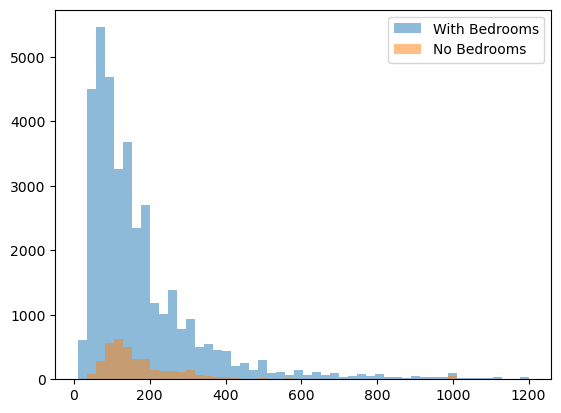

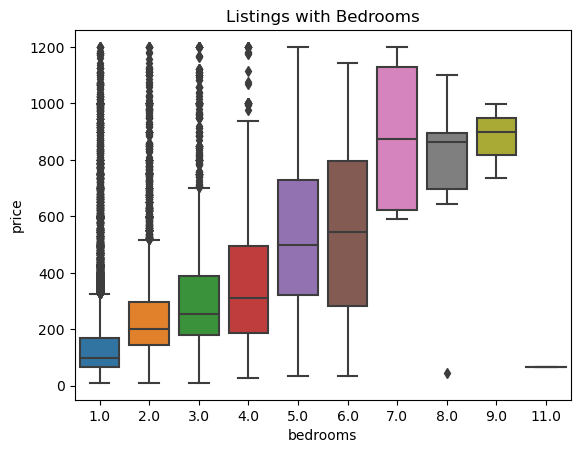

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two dataframes - one with bedroom information and one without
df_bedrooms = df[df['bedrooms'].notna()]
df_no_bedrooms = df[df['bedrooms'].isna()]

# Plot histograms of the price column for each dataframe
plt.hist(df_bedrooms['price'], bins=50, alpha=0.5, label='With Bedrooms')
plt.hist(df_no_bedrooms['price'], bins=50, alpha=0.5, label='No Bedrooms')
plt.legend(loc='upper right')
plt.show()

# boxplot of the price column 
sns.boxplot(x='bedrooms', y='price', data=df_bedrooms)
plt.title('Listings with Bedrooms')
plt.show()

These plots tell us two important things. The listings with missing bedroom information are more likely to be lower priced (below average), and that there appears to be a direct correlation between number of bedrooms and price. This means these listings are more likely going to have a smaller number of bedrooms. Lets plot the room_type for these listings to see if we can get more information.

<AxesSubplot:xlabel='room_type', ylabel='count'>

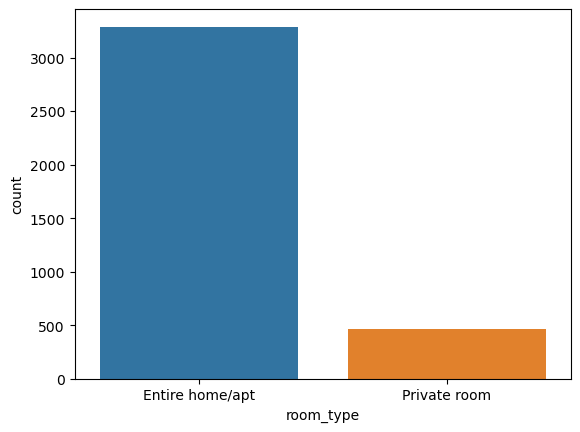

In [38]:
sns.countplot(x='room_type', data=df_no_bedrooms)

Excellent, we've identified some ~500 listings that are private rooms. We can safely set the bedroom count for these listings as 1.

In [39]:
# Find the indices of the rows with missing bedrooms and Private room type
idx = df.loc[df['bedrooms'].isna() & (df['room_type'] == 'Private room')].index

# Fill the missing values with 1 for the selected rows
df.loc[idx, 'bedrooms'] = 1

For now, I will drop the remaining entries.

In [40]:
df = df.dropna(subset=['bedrooms'])

In [41]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
borough                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
reviews_per_month                 8306
calculated_host_listings_count       0
availability_365                     0
accommodates                         0
bedrooms                             0
bathrooms_text                      44
amenities                            0
price_range                          0
bathrooms                            0
reviews_count                        0
room_type_encoded                    0
price_range_encoded                  0
dtype: int64

In [42]:
cols_to_keep = ['name','borough', 'neighbourhood','room_type_encoded','price','bathrooms', 'accommodates','bedrooms','price_range_encoded','minimum_nights','availability_365']
cols_for_later = ['id', 'name','longitude','latitude','price','borough']
df_final = df.loc[:, cols_to_keep]
df_final.head()

,name,borough,neighbourhood,room_type_encoded,price,bathrooms,accommodates,bedrooms,price_range_encoded,minimum_nights,availability_365
0,"Spacious Brooklyn Duplex, Patio + Garden",Brooklyn,Sunset Park,0,275,1.0,4,2.0,2,21,267
1,Cozy Clean Guest Room - Family Apt,Manhattan,Upper West Side,1,75,1.0,1,1.0,0,2,0
2,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,1,60,1.0,2,1.0,1,30,322
3,Large Furnished Room Near B'way,Manhattan,Midtown,1,68,1.0,2,1.0,1,2,79
5,Uptown Sanctuary w/ Private Bath (Month to Month),Manhattan,East Harlem,1,65,1.0,1,1.0,1,30,300


In [43]:
df_final.isna().sum()

name                   0
borough                0
neighbourhood          0
room_type_encoded      0
price                  0
bathrooms              0
accommodates           0
bedrooms               0
price_range_encoded    0
minimum_nights         0
availability_365       0
dtype: int64

In [44]:
df_final.to_csv('listings_eda', index=False)

In [45]:
coordinate_data = df.loc[:, cols_for_later]
coordinate_data.to_csv('coordinate_data', index=False)